# Simulating varying head at x=0 using sudden changes of head

The aquifer is considered of constant transmissivity $kD$ and storage coefficient $S$ and to extend from $0 \le x \le \infty$.

The partial differential equation is

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t}  $$

The solution for a sudden change of head equal to $A [m]$ at $x=0$ and $t = 0$ is

$$ s(x, t) = A \,\mathtt{erfc}(u), \,\,\,\, u=\sqrt{\frac {x^2 S} {4 kD t}} $$

where $\mathtt {erfc} () $ is the so-called complementary error function:

$$ \mathtt {erfc} (z) = \frac 2 {\sqrt {\pi} } \intop _z ^\infty e ^{-y^2}dy $$

And so its derivative is

$$ \frac {d \mathtt{erfc}(z)} {d z} = - \frac 2 {\sqrt {\pi}} e ^{-z^2} $$

Therefore, the discharge equals

$$ Q = -kD \frac {\partial s} {\partial x} = A \sqrt{\frac {kDS} {\pi t}} \mathtt{exp} \left( -u^2 \right) $$

and for $ x = 0 $

$$ Q_0 = A \sqrt{\frac {kD S} {\pi t}}$$

## Superposition

Any varying head can be approximated using a series of constant heads over short time intervals. This allows to use de 1D solution for a sudden head change to simulate the effect on an aquifer of a varying river head. It is assumed that the aquifer is in direct good contact with the surface water at $x=0$.

The superpostion may be written as

$$ s(x, t) = \sum _{i=1} ^{N} \left\{ A_i \mathtt{erfc} 
\sqrt{\frac {x^2 S} {4 kD (t - t_i)}} \right\}, \,\,\, t \ge t_i $$

Clearly, $a$ term $i$ is non-existent when $t < t_i$.

This formula can be computed by looping over the amplituces and times pertaining to each moment on which the amplitude changes.

With a series of amplitudues A, what matters is the change of amplitude. So we need

$$ A = A_0, A_1 - A_0, A_2 - A_1, ... A_n - A_{n-1} $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [3]:
s0    = np.array([1.5, 0.5, 1.0, -1.2, 0.5, -1.8, 0.3, -3, 1, 0.5, -0.3]) # m
swt   = np.arange(len(s0)) # switch times
A     = np.hstack((s0[0], np.diff(s0)))


In [12]:
swt   = np.arange(len(s0))
print(swt)

[ 0  1  2  3  4  5  6  7  8  9 10]


s0 =    1.5    0.5    1.0   -1.2    0.5   -1.8    0.3   -3.0    1.0    0.5   -0.3  [m]
A  =    1.5   -1.0    0.5   -2.2    1.7   -2.3    2.1   -3.3    4.0   -0.5   -0.8  [m]


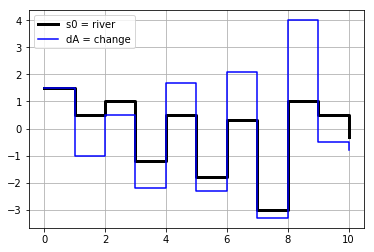

In [14]:
kD = 900 # m2/d
S = 0.1 # [-]

s0    = np.array([1.5, 0.5, 1.0, -1.2, 0.5, -1.8, 0.3, -3, 1, 0.5, -0.3]) # m
swt   = np.arange(len(s0)) # switch times
A     = np.hstack((s0[0], np.diff(s0)))

# show the switch times s0 and A
# this is an advanced way of neatly printed a line of formatted numbers
# makeing sure that the numbers in both lines are exactly aboven each other
# you could also just print(s0) and print(A)
print('s0 = ' + ' '.join(['{:6.1f}'.format(a) for a in s0]) + '  [m]')
print('A  = ' + ' '.join(['{:6.1f}'.format(a) for a in A])  + '  [m]')
    

# plot the amplitudes and their changes
plt.step(swt, s0, 'k', label="s0 = river", lw=3, where='post')
plt.step(swt, A, ' b ',  label='dA = change', where='post')
plt.grid()
plt.legend()
plt.show()

[ 0.    0.33  0.66  0.99  1.32  1.65  1.98  2.31  2.64  2.97  3.3   3.63
  3.96  4.29  4.62  4.95  5.28  5.61  5.94  6.27  6.6   6.93  7.26  7.59
  7.92  8.25  8.58  8.91  9.24  9.57  9.9  10.23 10.56 10.89 11.22 11.55
 11.88 12.21 12.54 12.87 13.2  13.53 13.86 14.19 14.52 14.85 15.18 15.51
 15.84 16.17 16.5  16.83 17.16 17.49 17.82 18.15 18.48 18.81 19.14 19.47
 19.8  20.13 20.46 20.79 21.12 21.45 21.78 22.11 22.44 22.77 23.1  23.43
 23.76 24.09 24.42 24.75 25.08 25.41 25.74 26.07 26.4  26.73 27.06 27.39
 27.72 28.05 28.38 28.71 29.04 29.37 29.7  30.03 30.36 30.69 31.02 31.35
 31.68 32.01 32.34 32.67 33.  ]


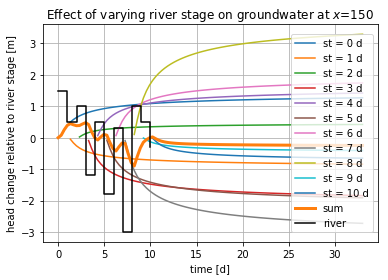

In [15]:
t = np.linspace(0, 3 * len(s0), 101) # times in days
x = 150. # choose a value for x
print(t)
# plot heads
plt.title("Effect of varying river stage on groundwater at $x$={:.0f}".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, label='sum', lw=3) 
plt.step(swt, s0, 'k', label='river', where='post')
plt.legend(loc='right')
plt.show()

## The discharge at x=0

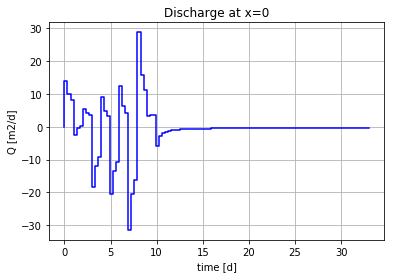

In [49]:
Q0 = np.zeros_like(t)
for ts, a in zip(swt, A):
    Q0[t > ts] += a * np.sqrt(kD * S / (np.pi * (t[t > ts] - ts)) )

plt.title('Discharge at x=0')
plt.ylabel('Q [m2/d]')
plt.xlabel('time [d]')
plt.grid()
plt.step(t, Q0, 'b', label='Q0')
plt.show()

